# time Module

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

import mglearn
#import t_Mod
from t_Mod import *
#from t_Mod.plots_t import *

In [2]:
df = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "constant_trial.csv") )

# 예제를 위해 몇개의 열만 선택합니다
#df = df[['IR', 'FlowHt', 'Const', 'Var', 'Base', 'MixS75','MixS50','MixS25']]
df = df[['IR', 'FlowHt', 'Base', 'MixS75','MixS50','MixS25']]
display(df.head())

,IR,FlowHt,Base,MixS75,MixS50,MixS25
0,1.0000,0.0000,1,0,0,0
1,0.9995,0.1798,1,0,0,0
2,0.9985,0.5389,1,0,0,0
3,0.9970,1.0757,1,0,0,0
4,0.9950,1.7884,1,0,0,0


(1.041325, 0.0)

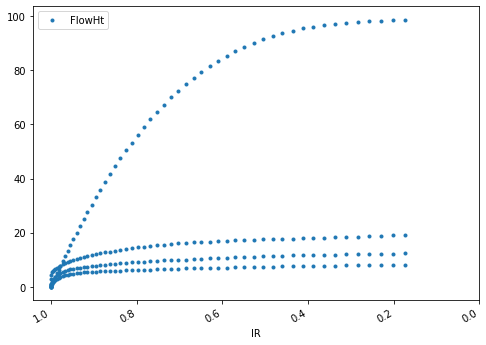

In [3]:

df_pop = df.copy()
IR =  df_pop.pop('IR')

plot_cols = ['FlowHt']
plot_features = df[plot_cols]
plot_features.index = IR
_ = plot_features.plot( linestyle = 'None', marker = '.', subplots=True)
plt.xlim([plt.xlim()[1], 0])



(1.041325, 0.0)

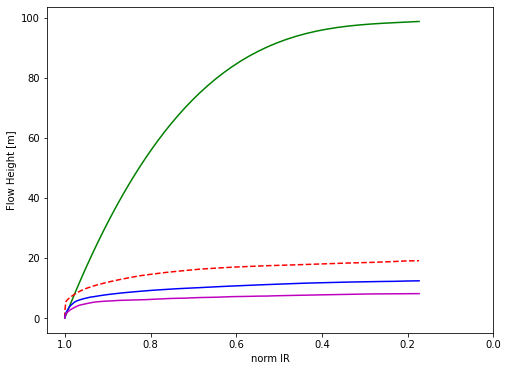

In [4]:

plt.plot(df.iloc[0:58,0], df.iloc[0:58,1], 'g-'
         , df.iloc[58:116,0], df.iloc[58:116,1],'r--'
         ,df.iloc[116:174,0], df.iloc[116:174,1],'b-'
         ,df.iloc[174:232,0], df.iloc[174:232,1], 'm-')
plt.xlabel('norm IR')
plt.ylabel('Flow Height [m]')
#plt.axis('equal')
#plt.axis('square')
plt.xlim([plt.xlim()[1], 0])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([-100, 100], [-100, 100])


In [5]:
# ## 데이터 정규화

num_features = df.shape[1]
num_features



6

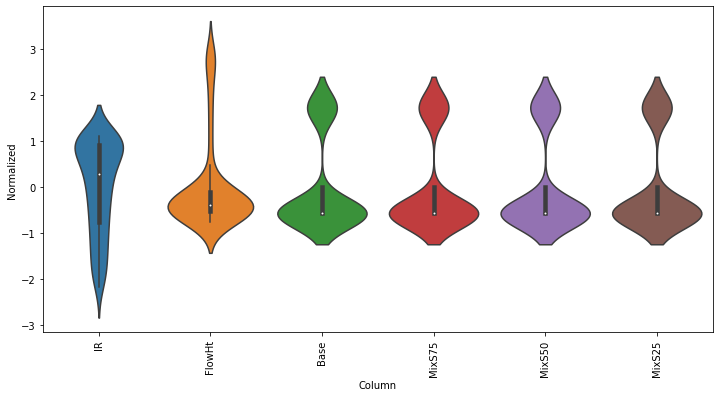

In [6]:
df_mean = df.mean()
df_std = df.std()
df_std_s = (df - df_mean) / df_std
df_std_m = df_std_s.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std_m)
_ = ax.set_xticklabels(df.keys(), rotation=90)


In [7]:
# data
df_org = df
df = df_std_s

column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)

curve_0 = df[0:int(n*0.25)].copy()
curve_1 = df[int(n*0.25):int(n*0.5)].copy()
curve_2 = df[int(n*0.5):int(n*0.75)].copy()
curve_3 = df[int(n*0.75):].copy()
#train_df_s = train_df_s.reset_index(drop=True)


### curve_0

In [8]:
crv_0 = curve_0.copy()
crv_0 = crv_0.reset_index(drop=True)

In [9]:
for i in range(1, 5):
    train_df_0 = crv_0[0:int(n*0.25*0.2*i)]
    val_df_0 = crv_0[int(n*0.25*0.05*i):int(n*0.25*0.2*i)]
    test_df_0 = crv_0[int(n*0.25*0.2*i-4):int(n*0.25*0.2*(i+1))]
#    test_df_0 = crv_0[int(n*0.25*0.2*i-3):int(n*0.25*0.2*(i+1))]
    exec(f'train_df_0{i-1} = train_df_0')
    exec(f'val_df_0{i-1} = val_df_0')
    exec(f'test_df_0{i-1} = test_df_0')


In [10]:
#train_total = {0: train_df_00 , 1: train_df_01, 2: train_df_02, 3: train_df_03}
#val_total = {0: val_df_00 , 1: val_df_01, 2: val_df_02, 3: val_df_03}
#test_total = {0: test_df_00 , 1: test_df_01, 2: test_df_02, 3: test_df_03}

train_total = [train_df_00, train_df_01, train_df_02, train_df_03]
val_total = [val_df_00, val_df_01, val_df_02, val_df_03]
test_total = [test_df_00, test_df_01, test_df_02, test_df_03]

ttt = { 'tr' : train_total, 'va' : val_total, 'te' : test_total}
ttt = pd.DataFrame(ttt)
print(ttt.columns)
print(ttt.index)

Index(['tr', 'va', 'te'], dtype='object')
RangeIndex(start=0, stop=4, step=1)


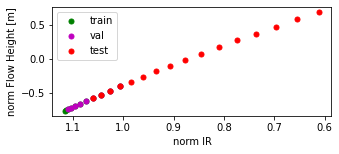

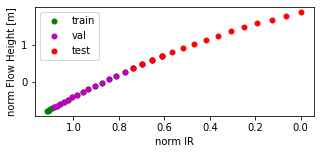

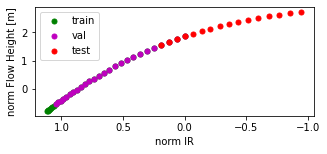

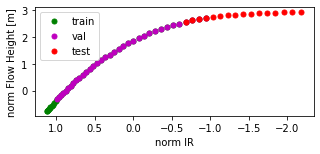

In [11]:
#from t_Mod.plots_t import plot_curve, eval, add_curve # absolute path, import 함수

for i in range(0, 4) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt.iloc[i]['tr']
        va = ttt.iloc[i]['va']
        te = ttt.iloc[i]['te']
#        plot_curve(tr, va, te)
        plots_t.plot_curve(tr, va, te)
#        t_Mod.plots_t.plot_curve(tr, va, te)


### curve_1

In [12]:
crv_1 = curve_1.copy()
#crv_1 = crv_1.reset_index(drop=True)

In [13]:
for i in range(1, 5):
    train_df_1 = crv_1[0:int(n*0.25*0.2*i)]
#    val_df_0 = crv_0[int(n*0.25*0.1*i):int(n*0.25*0.2*i)]
    val_df_1 = crv_1[int(n*0.25*0.05*i):int(n*0.25*0.2*i)]
    test_df_1 = crv_1[int(n*0.25*0.2*i-4):int(n*0.25*0.2*(i+1))]
    exec(f'train_df_1{i-1} = train_df_1')
    exec(f'val_df_1{i-1} = val_df_1')
    exec(f'test_df_1{i-1} = test_df_1')

In [14]:
train_t_1 = {0: train_df_10 , 1: train_df_11, 2: train_df_12, 3: train_df_13}
val_t_1 = {0: val_df_10 , 1: val_df_11, 2: val_df_12, 3: val_df_13}
test_t_1 = {0: test_df_10 , 1: test_df_11, 2: test_df_12, 3: test_df_13}

ttt_1 = { 'tr' : train_t_1, 'va' : val_t_1, 'te' : test_t_1}
ttt_1 = pd.DataFrame(ttt_1)

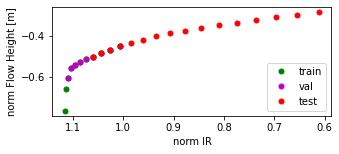

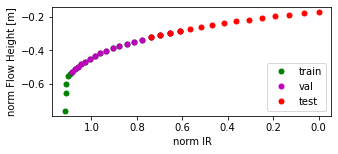

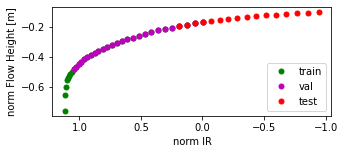

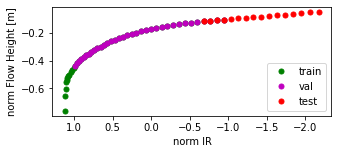

In [15]:
for i in range(0, 4) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_1.iloc[i]['tr']
        va = ttt_1.iloc[i]['va']
        te = ttt_1.iloc[i]['te']
        plots_t.plot_curve(tr, va, te)

### curve_2

In [16]:
crv_2 = curve_2.copy()
#crv_2 = crv_2.reset_index(drop=True)

In [17]:
for i in range(1, 5):
    train_df_2 = crv_2[0:int(n*0.25*0.2*i)]
#    val_df_0 = crv_0[int(n*0.25*0.1*i):int(n*0.25*0.2*i)]
    val_df_2 = crv_2[int(n*0.25*0.05*i):int(n*0.25*0.2*i)]
    test_df_2 = crv_2[int(n*0.25*0.2*i-4):int(n*0.25*0.2*(i+1))]
    exec(f'train_df_2{i-1} = train_df_2')
    exec(f'val_df_2{i-1} = val_df_2')
    exec(f'test_df_2{i-1} = test_df_2')

In [18]:
train_t_2 = {0: train_df_20 , 1: train_df_21, 2: train_df_22, 3: train_df_23}
val_t_2 = {0: val_df_20 , 1: val_df_21, 2: val_df_22, 3: val_df_23}
test_t_2 = {0: test_df_20 , 1: test_df_21, 2: test_df_22, 3: test_df_23}

ttt_2 = { 'tr' : train_t_2, 'va' : val_t_2, 'te' : test_t_2}
ttt_2 = pd.DataFrame(ttt_2)

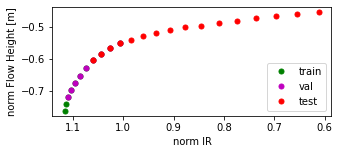

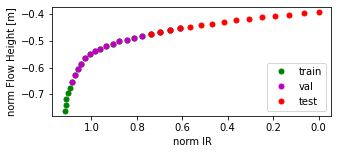

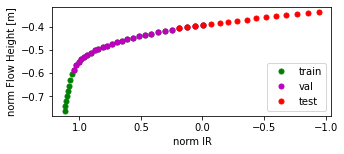

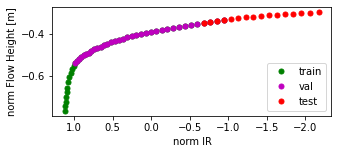

In [19]:
for i in range(0, 4) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_2.iloc[i]['tr']
        va = ttt_2.iloc[i]['va']
        te = ttt_2.iloc[i]['te']
        plots_t.plot_curve(tr, va, te)

### curve_3

In [20]:
crv_3 = curve_3.copy()
#crv_2 = crv_2.reset_index(drop=True)

In [21]:
for i in range(1, 5):
    train_df_3 = crv_3[0:int(n*0.25*0.2*i)]
#    val_df_0 = crv_0[int(n*0.25*0.1*i):int(n*0.25*0.2*i)]
    val_df_3 = crv_3[int(n*0.25*0.05*i):int(n*0.25*0.2*i)+3]
    test_df_3 = crv_3[int(n*0.25*0.2*i):int(n*0.25*0.2*(i+1))]
    exec(f'train_df_3{i-1} = train_df_3')
    exec(f'val_df_3{i-1} = val_df_3')
    exec(f'test_df_3{i-1} = test_df_3')

In [22]:
train_t_3 = {0: train_df_30 , 1: train_df_31, 2: train_df_32, 3: train_df_33}
val_t_3 = {0: val_df_30 , 1: val_df_31, 2: val_df_32, 3: val_df_33}
test_t_3 = {0: test_df_30 , 1: test_df_31, 2: test_df_32, 3: test_df_33}

ttt_3 = { 'tr' : train_t_3, 'va' : val_t_3, 'te' : test_t_3}
ttt_3 = pd.DataFrame(ttt_3)

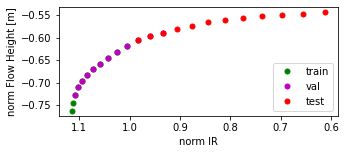

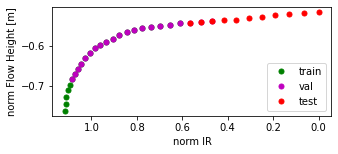

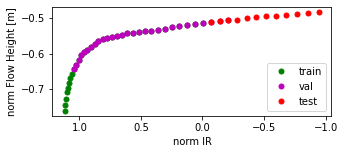

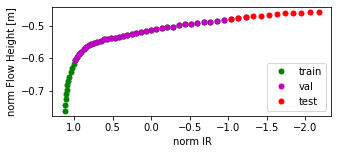

In [23]:

for i in range(0, 4) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_3.iloc[i]['tr']
        va = ttt_3.iloc[i]['va']
        te = ttt_3.iloc[i]['te']
        plots_t.plot_curve(tr, va, te)




## 데이터 창 작업
### WindowGrerator Class
## WinGen()

In [24]:
# WindowGen needs train_df
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
train_df = train_df_01.copy()
val_df = val_df_01.copy()
test_df = test_df_01.copy()


## plot : original
- one batch example
- time indices plot
- example 3 signal dataset

## plot_batch
- plot all bach datasets
- use of WinGen() for a time axis
- for "train" dataset
- for all batch data or the required batch set
- include "prediction"
- plot a total data in one figure




# Single step models
- Baseline
- LInear model
- Dense
- Multi-step dense
- Recurrent neural network
- Performance
- Multi-output model

In [25]:
single_step_window = Class_t.WindowGenerator(
    input_width=1, label_width=1, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['FlowHt']

In [26]:
single_step_window_t = Class_t.WinGen(
    input_width=1, label_width=1, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])
single_step_window_t

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['FlowHt']

## Baseline

In [27]:
'''
baseline = Baseline(label_index=column_indices['FlowHt'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

### Evaluate performance
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)
'''

"\nbaseline = Baseline(label_index=column_indices['FlowHt'])\n\nbaseline.compile(loss=tf.losses.MeanSquaredError(),\n                 metrics=[tf.metrics.MeanAbsoluteError()])\n\n### Evaluate performance\nval_performance = {}\nperformance = {}\nval_performance['Baseline'] = baseline.evaluate(single_step_window.val)\nperformance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)\n"

### prediction plot


### Complie and Fit function

### Function Add curves


## Linear Model



### Multi Step Dense

In [28]:
CONV_WIDTH = 3
conv_window = Class_t.WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv_window

conv_window_t = Class_t.WinGen(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv_window_t

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['FlowHt']

In [29]:
wide_window = Class_t.WindowGenerator(
    input_width=8, label_width=8, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_window
#print(wide_window)
wide_window_t = Class_t.WinGen(
    input_width=8, label_width=8, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_window_t

Total window size: 9
Input indices: [0 1 2 3 4 5 6 7]
Label indices: [1 2 3 4 5 6 7 8]
Label column name(s): ['FlowHt']

### Convolution Model



In [30]:
tr_loss_con = []
va_loss_con= []
tr_mae_con = []
va_mae_con = []



In [31]:
tr0 = ttt.iloc[3]['tr']
tr1 = tr0.append(ttt_1.iloc[3]['tr'])
tr2 = tr1.append(ttt_2.iloc[3]['tr'])
tr3 = tr2.append(ttt_3.iloc[3]['tr'])

va0 = ttt.iloc[3]['va']
va1 = va0.append(ttt_1.iloc[3]['va'])
va2 = va1.append(ttt_2.iloc[3]['va'])
va3 = va2.append(ttt_3.iloc[3]['va'])

te0 = ttt.iloc[3]['te']
te1 = te0.append(ttt_1.iloc[3]['te'])
te2 = te1.append(ttt_2.iloc[3]['te'])
te3 = te2.append(ttt_3.iloc[3]['te'])


In [32]:
LABEL_WIDTH = 8
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = Class_t.WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window




Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

### 순환 신경망

Recurrent Neural Network(RNN)는 시계열 데이터에 적합한 신경망 유형입니다. RNN은 시계열을 단계별로 처리하여 타임스텝 사이에서 내부 상태를 유지합니다.

자세한 내용은 [텍스트 생성 튜토리얼](https://www.tensorflow.org/tutorials/text/text_generation) 또는 [RNN 가이드](https://www.tensorflow.org/guide/keras/rnn)를 읽어보세요.

이 튜토리얼에서는 [Long Short Term Memory](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/LSTM)(LSTM)이라는 RNN 레이어를 사용합니다.

모든 keras RNN 레이어에 대한 중요한 생성자 인수는 `return_sequences` 인수입니다. 이 설정은 다음 두 가지 방법 중 하나로 레이어를 구성할 수 있습니다.

1. 기본값인 `False`인 경우 레이어는 최종 타임스텝의 출력만 반환하여 단일 예측을 수행하기 전에 모델이 내부 상태를 준비할 시간을 줍니다.

![An lstm warming up and making a single prediction](https://www.tensorflow.org/tutorials/structured_data/images/lstm_1_window.png)

1. `True`이면 레이어가 각 입력에 대한 출력을 반환합니다. 다음과 같은 경우에 유용합니다.

- RNN 레이어 쌓기
- 여러 타임스텝에서 동시에 모델 훈련

![An lstm making a prediction after every timestep](https://www.tensorflow.org/tutorials/structured_data/images/lstm_many_window.png)

In [39]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(16, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

`return_sequences=True`이면 모델을 한 번에 24시간 분량 데이터에 대해 훈련할 수 있습니다.

Note: This will give a pessimistic view of the model's performance. On the first timestep the model has no access to previous steps, and so can't do any better than the simple linear and dense models shown earlier.

In [40]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (15, 8, 6)
Output shape: (15, 8, 1)


In [41]:
_ = compile.compile_2(lstm_model)

In [36]:
tr_loss_con = []
va_loss_con= []
tr_mae_con = []
va_mae_con = []

In [46]:
train_loss_con, val_loss_con, train_mae_con, val_mae_con =  \
    plots_t.add_curve(curve=ttt, window=wide_window,
             window_t=wide_window_t, model=lstm_model, npat= 10, num_epoch=100 )
     # window_t=conv_window_t, model=conv_model, npat= 10, num_epoch=50)

tr_loss_con = tr_loss_con + train_loss_con
va_loss_con = va_loss_con + val_loss_con
tr_mae_con = tr_mae_con + train_mae_con
va_mae_con = va_mae_con + val_mae_con

print(f'End of curve0 -----------------')

KeyboardInterrupt: 

In [ ]:
wide_window_t.plot_xy(lstm_model,  n_batch=10 )

In [ ]:
wide_window_t.plot_batch(lstm_model,n_batch =10, figures="True")

### 성능



##### 다중 출력 모델 -skipped


### Advanced: Residual connections

The Baseline model from earlier took advantage of the fact that the sequence doesn't change drastically from time step to time step. Every model trained in this tutorial so far was randomly initialized, and then had to learn that the output is a a small change from the previous time step.

While you can get around this issue with careful initialization, it's simpler to build this into the model structure.

It's common in time series analysis to build models that instead of predicting the next value, predict how the value will change in the next timestep. Similarly, "Residual networks" or "ResNets" in deep learning refer to architectures where each layer adds to the model's accumulating result.

That is how you take advantage of the knowledge that the change should be small.

![A model with a residual connection](https://www.tensorflow.org/tutorials/structured_data/images/residual.png)

Essentially this initializes the model to match the Baseline. For this task it helps models converge faster, with slightly better performance.

This approach can be used in conjunction with any model discussed in this tutorial.

Here it is being applied to the LSTM model, note the use of the tf.initializers.zeros to ensure that the initial predicted changes are small, and don't overpower the residual connection. There are no symmetry-breaking concerns for the gradients here, since the zeros are only used on the last layer.

In [45]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each timestep is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [46]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(16, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small
        # So initialize the output layer with zeros
        kernel_initializer=tf.initializers.zeros)
]))

Wall time: 0 ns


In [47]:
_ = compile.compile_2(residual_lstm)


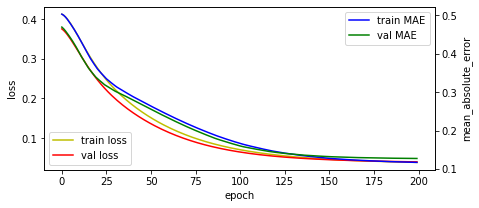

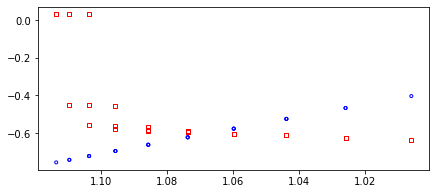

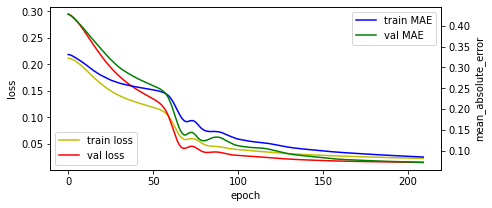

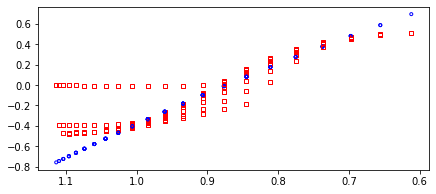

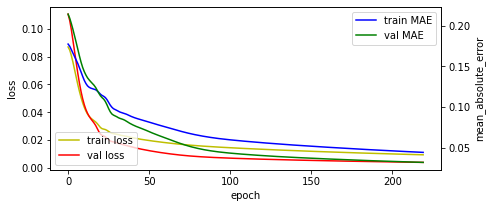

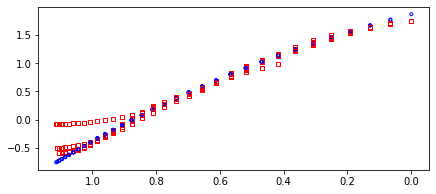

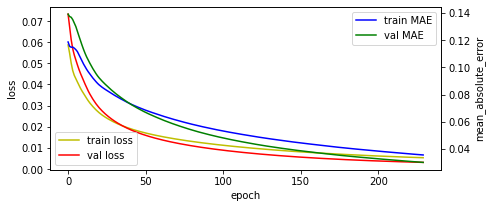

End of curve0 -----------------


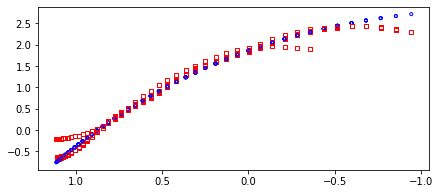

In [52]:
train_loss_con, val_loss_con, train_mae_con, val_mae_con =  \
    plots_t.add_curve(curve=ttt, window=wide_window,
             window_t=wide_window_t, model=residual_lstm, npat= 10, num_epoch=200 )
     # window_t=conv_window_t, model=conv_model, npat= 10, num_epoch=50)


print(f'End of curve0 -----------------')

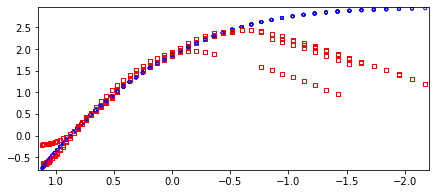

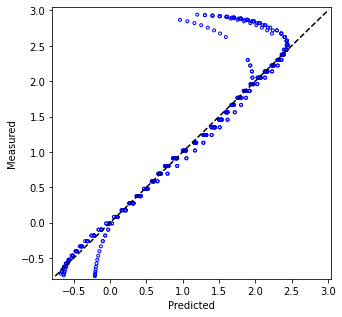

In [53]:
wide_window_t.plot_xy(residual_lstm,  n_batch=10 )

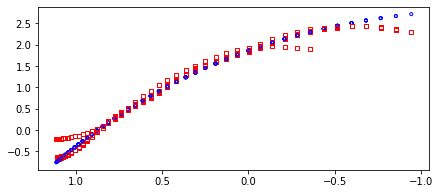

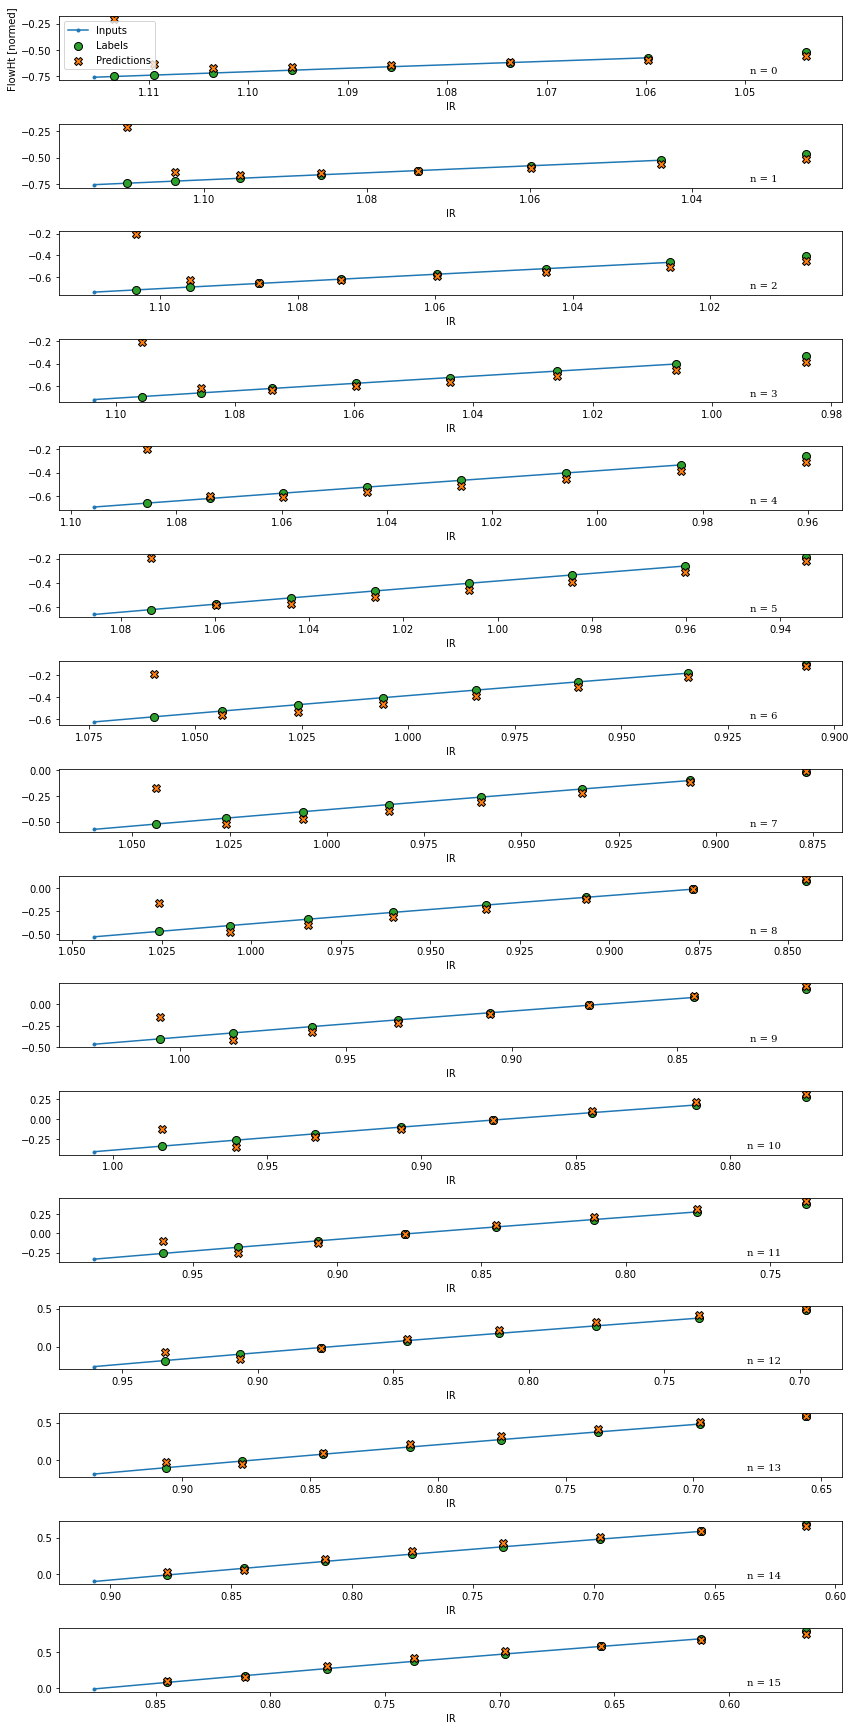

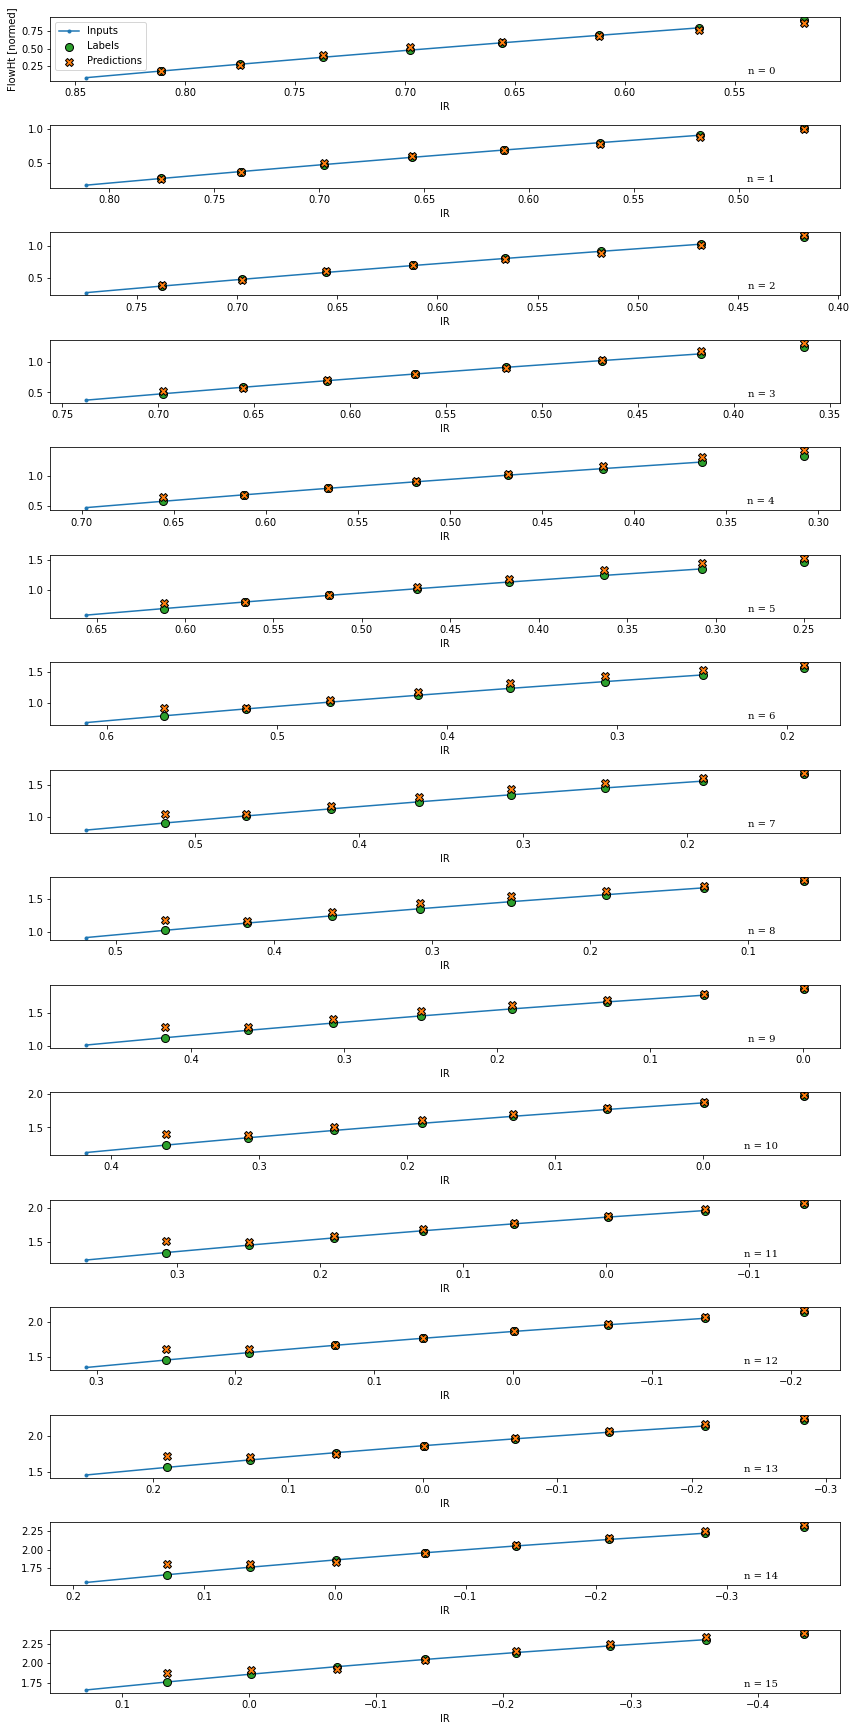

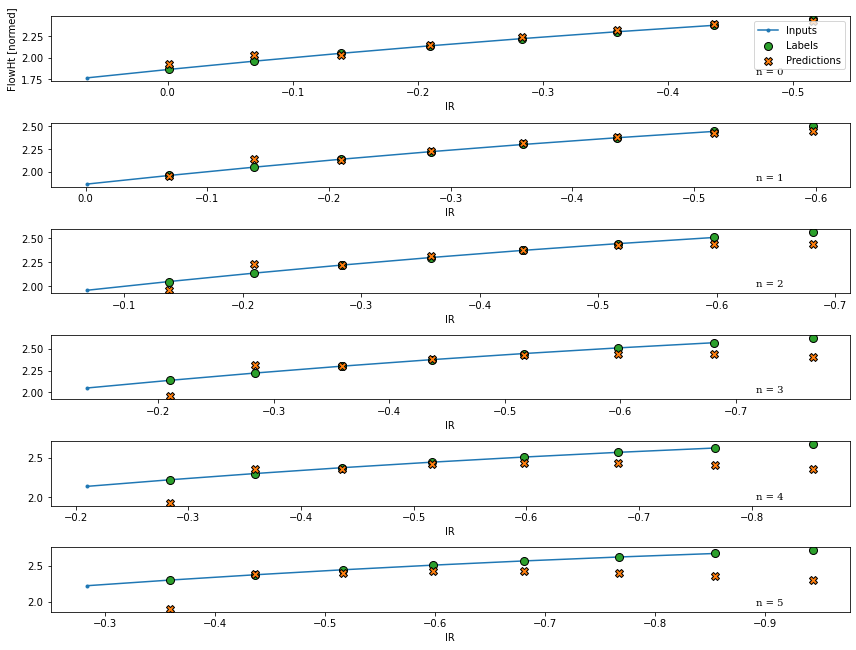

In [54]:
wide_window_t.plot_batch(residual_lstm,n_batch =10, figures="True")



#### 성능

다음은 이러한 다중 출력 모델의 전반적인 성능입니다.

In [ ]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

위의 성능은 모든 모델 출력에 대한 평균입니다.

